In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Reading merged business and review csv file.
restaurant = pd.read_csv("yelp_reviews_restaurants.csv")

In [3]:
#Exploratory Data Analysis

In [4]:
#Summary of restaurant.csv
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243636 entries, 0 to 243635
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   243636 non-null  object 
 1   name          243636 non-null  object 
 2   city          243636 non-null  object 
 3   state         243636 non-null  object 
 4   stars         243636 non-null  float64
 5   review_count  243636 non-null  int64  
 6   is_open       243636 non-null  int64  
 7   attributes    243109 non-null  object 
 8   categories    243636 non-null  object 
 9   user_id       243636 non-null  object 
 10  review_stars  243636 non-null  int64  
 11  text          243636 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 22.3+ MB


In [5]:
#First five rows of restaurant.csv
restaurant.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories,user_id,review_stars,text
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai",rS_OV4vl9rH61hd7w97Z-w,3,Decent food at reasonable prices. Ambiance is ...
1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai",DCJ4QsuWEeugPSg5mf_Lag,4,"Good food, and good sized portions for the pri..."
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai",xS9EBzNHTHeasB-ZusKD3w,4,The name of the venue is intriguing but after ...
3,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai",cgBbVjFPNh8dbCD-Xxfu_A,4,Really good Thai food. Had been looking a dece...
4,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,BC,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai",tBrRbxfZnF3Fs10rA9JwZw,5,Bookmarked AND the hubby recommended it. Our f...


In [6]:
#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is   527
categories      Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

In [7]:
#Drop any rows with NA values
restaurant = restaurant.dropna()

In [8]:
#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is     0
categories      Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


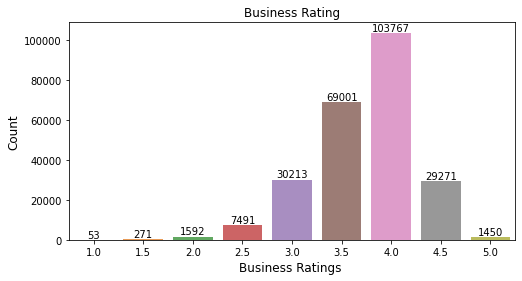

In [66]:
#Business Rating Graph
x=restaurant['stars'].value_counts()
x=x.sort_index()
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Business Rating")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Business Ratings ', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


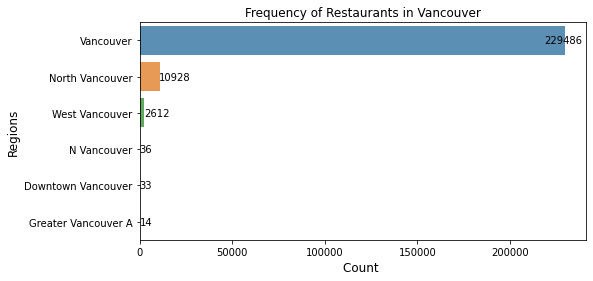

In [120]:
#Frequeny graph for different regions of Vancouver
x=restaurant['city'].value_counts()
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.values, x.index, alpha=0.8, orient='h')
plt.title("Frequency of Restaurants in Vancouver")
plt.ylabel('Regions', fontsize=12)
plt.xlabel('Count ', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


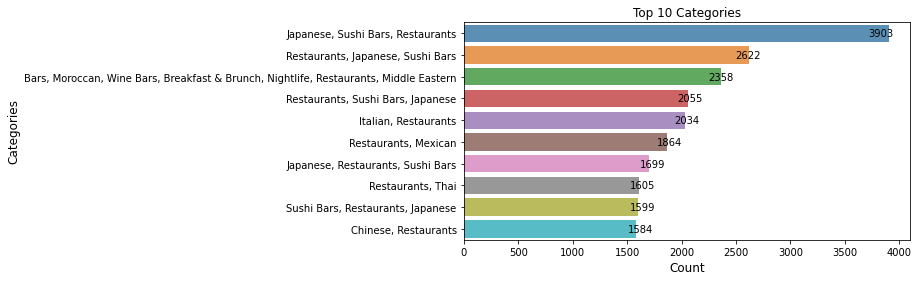

In [119]:
#Frequeny graph for Top 10 categories/cuisine

x=restaurant['categories'].value_counts()[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.values, x.index, alpha=0.8, orient='h')
plt.title("Top 10 Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


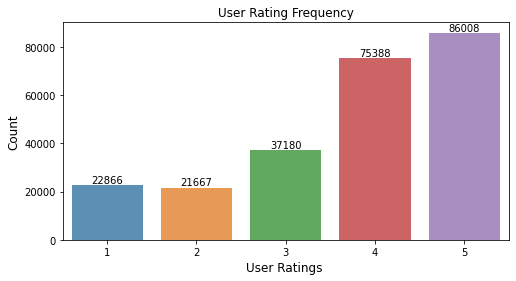

In [122]:
#User Ratings Graph
x=restaurant['review_stars'].value_counts()
x=x.sort_index()
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("User Rating Frequency")
plt.ylabel('Count', fontsize=12)
plt.xlabel('User Ratings ', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [13]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [147]:
#Extracting positive and negative sentiments
df_sentiment = restaurant[['name', 'text']]
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [148]:
df_sentiment['Polarity'] = df_sentiment['text'].apply(pol)
#df_sentiment['Subjectivity'] = df_sentiment['text'].apply(sub)
df_sentiment.head()


<ipython-input-148-82ee5671af9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['Polarity'] = df_sentiment['text'].apply(pol)


,name,text,Polarity
0,Bob Likes Thai Food,Decent food at reasonable prices. Ambiance is ...,0.066667
1,Bob Likes Thai Food,"Good food, and good sized portions for the pri...",0.253158
2,Bob Likes Thai Food,The name of the venue is intriguing but after ...,0.076335
3,Bob Likes Thai Food,Really good Thai food. Had been looking a dece...,0.326190
4,Bob Likes Thai Food,Bookmarked AND the hubby recommended it. Our f...,0.145279


In [149]:
df_sentiment['Sentiment_Type'] =''
df_sentiment.loc[df_sentiment['Polarity'] > 0, 'Sentiment_Type'] = 'Positive'
df_sentiment.loc[df_sentiment['Polarity'] < 0, 'Sentiment_Type'] = 'Negative'
df_sentiment.loc[df_sentiment['Polarity'] == 0, 'Sentiment_Type'] = 'Neutral'
df_sentiment.head()

<ipython-input-149-12c776855662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['Sentiment_Type'] =''
c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,name,text,Polarity,Sentiment_Type
0,Bob Likes Thai Food,Decent food at reasonable prices. Ambiance is ...,0.066667,Positive
1,Bob Likes Thai Food,"Good food, and good sized portions for the pri...",0.253158,Positive
2,Bob Likes Thai Food,The name of the venue is intriguing but after ...,0.076335,Positive
3,Bob Likes Thai Food,Really good Thai food. Had been looking a dece...,0.326190,Positive
4,Bob Likes Thai Food,Bookmarked AND the hubby recommended it. Our f...,0.145279,Positive


c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


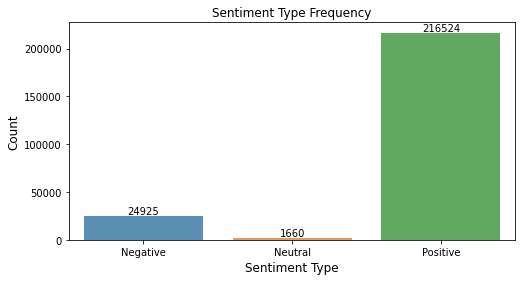

In [152]:
x=df_sentiment['Sentiment_Type'].value_counts()
x=x.sort_index()
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Sentiment Type Frequency")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment Type', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
rest1 = restaurant.text[restaurant.name == "Bob Likes Thai Food"]
#Combine dataframe text column
combine_text = " ".join(rest1)

In [ ]:
#Creating Wordcloud
wordcloud = WordCloud().generate(combine_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()